<a href="https://colab.research.google.com/github/athif119140191/AI-basic_GaussianNB/blob/main/Predict_Kelulusan_GaussianNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install jcopml

In [4]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe

In [12]:
df = pd.read_csv("/content/data_lulus_tepat_waktu.csv")
df

,ip1,ip2,ip3,ip4,tepat
0,2.30,1.97,1.80,1.56,Tidak
1,1.81,1.68,1.57,1.86,Tidak
2,3.07,3.00,2.75,3.21,Tidak
3,2.71,2.33,2.61,1.98,Tidak
4,3.17,3.02,3.28,2.96,Tidak
...,...,...,...,...,...
1682,3.07,3.04,3.39,3.55,Ya
1683,3.29,3.22,3.33,3.68,Ya
1684,3.31,3.25,3.44,3.52,Ya
1685,3.44,3.35,3.50,3.50,Ya


In [14]:
X = df.drop(columns="tepat")
y = df.tepat



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1349, 4), (338, 4), (1349,), (338,))

In [15]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["ip1","ip2","ip3","ip4"]),
])

In [16]:
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB())
])

In [17]:
pipeline.fit(X_train, y_train) 
# Melakukan Traning Data Terhadap x dan y

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['ip1', 'ip2', 'ip3',
                                                   'ip4'])])),
                ('algo', GaussianNB())])

In [19]:
pipeline.score(X_train, y_train)

# Score yang sangat Bagus untuk data testing 

0.860637509266123

In [20]:
# data Testing Score 

pipeline.score(X_test, y_test)

0.8579881656804734

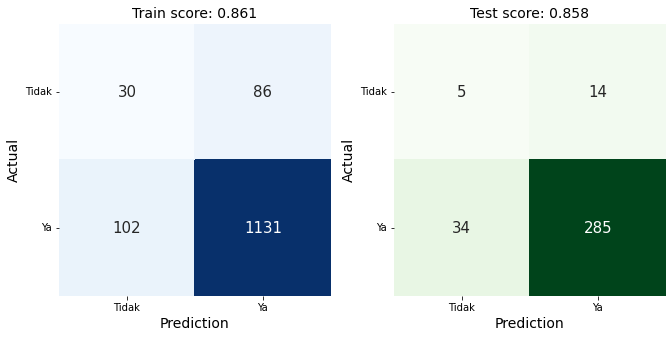

In [21]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)

In [24]:
# Disini saya melakukan Prediksi pada data yang sudah saya siapkan sebelumya 

X_pred = pd.read_csv("/content/test.csv")
X_pred

,ip1,ip2,ip3,ip4,tepat
0,3.52,3.35,3.42,3.3,Ya


In [25]:
pipeline.predict(X_pred)

array(['Ya'], dtype='<U5')

In [26]:
X_pred["tepat_pred"] = pipeline.predict(X_pred)
X_pred

,ip1,ip2,ip3,ip4,tepat,tepat_pred
0,3.52,3.35,3.42,3.3,Ya,Ya
